<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
Clt = '/content/Classeurbb.xlsx'
datat1= pd.read_excel(Clt,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [ ]:
del datat1["Source"]
del datat1["CodeSite"]
datat1.head()

,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.91142,23.79474,0,0.000000,0.0,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.18837,27.13295,0,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.18837,27.13295,0,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.18562,27.15794,1,0.000000,0.0,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.16718,27.15773,0,0.000000,0.0,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8


In [ ]:
(datat1[datat1["Cx_theileri"]==0]).count

<bound method DataFrame.count of        X_long     Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
0   -15.91142  23.79474            0  ...       5.4       5.5       4.9
1   -13.18837  27.13295            0  ...       4.3       3.7       3.8
2   -13.18837  27.13295            0  ...       4.3       3.7       3.8
4   -13.16718  27.15773            0  ...       4.2       3.6       3.8
5   -13.20156  27.16507            0  ...       4.6       3.8       3.9
..        ...       ...          ...  ...       ...       ...       ...
160  -6.00400  30.45600            0  ...       2.7       3.0       2.8
162  -6.23900  30.69500            0  ...       2.7       3.0       3.2
163  -6.91000  30.91300            0  ...       2.7       2.9       2.8
164  -6.86400  30.86600            0  ...       3.4       3.4       3.6
166  -5.00000  31.52220            0  ...       3.4       2.8       3.0

[114 rows x 226 columns]>

In [ ]:
(datat1[datat1["Cx_theileri"]==1]).count

<bound method DataFrame.count of         X_long      Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
3   -13.185620  27.157940            1  ...       4.1       3.7       3.9
7   -13.207000  27.166000            1  ...       4.6       3.8       3.9
11  -13.214230  27.166700            1  ...       4.4       3.6       3.8
15  -10.227900  28.971600            1  ...       3.6       3.3       3.7
18  -10.585830  28.973590            1  ...       3.1       3.4       3.7
..         ...        ...          ...  ...       ...       ...       ...
296  -5.283333  35.633333            1  ...       3.9       3.4       3.8
297  -5.325286  35.685852            1  ...       4.0       3.9       4.3
298  -5.833954  35.759465            1  ...       3.5       3.8       3.9
299  -5.366667  35.766667            1  ...       4.0       4.0       4.2
300  -5.816667  35.783333            1  ...       3.6       3.8       4.0

[187 rows x 226 columns]>

In [ ]:
Xt1 = datat1.loc[:, datat1.columns != 'Cx_theileri']
yt1 = datat1.Cx_theileri

In [ ]:
Xt1

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-5.283333,35.633333,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
297,-5.325286,35.685852,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,93,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
298,-5.833954,35.

In [ ]:
yt1

0      0
1      0
2      0
3      1
4      0
      ..
296    1
297    1
298    1
299    1
300    1
Name: Cx_theileri, Length: 301, dtype: int64

In [ ]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score

XGBClassifier


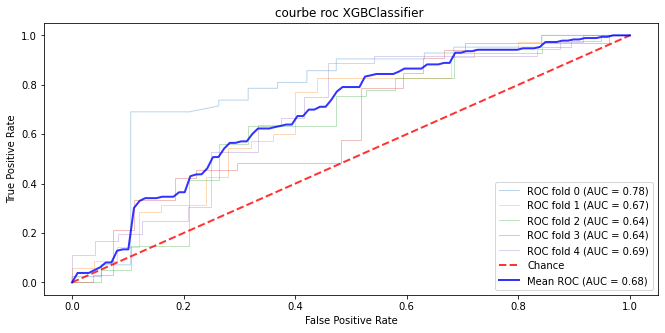

Accuracy: [0.75409836 0.68333333 0.65       0.66666667 0.73333333]
moy_accuracy: 0.70
precision: [0.82926829 0.69047619 0.76315789 0.63829787 0.73809524]
moy_precision: 0.73
sensibilité : [0.80952381 0.82857143 0.70731707 0.90909091 0.86111111]
moy_sensibilité: 0.82
spécificité : [0.63157895 0.48       0.52631579 0.37037037 0.54166667]
moy_spécificité: 0.51
MCC : [0.43514529 0.33197    0.22552751 0.33747367 0.43058756]
MCC: 0.35
MCC : [0.43514529 0.33197    0.22552751 0.33747367 0.43058756]
MCC: 0.35
balanced_accuracy : [0.72055138 0.65428571 0.61681643 0.63973064 0.70138889]
balanced_accuracy: 0.67
roc_auc : [0.78258145 0.67428571 0.63799743 0.64085297 0.6875    ]
roc_auc: 0.68
cohen_kappa_scorec : [0.43483632 0.32142857 0.22413793 0.29328622 0.42028986]
cohen_kappa_scorec: 0.34
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


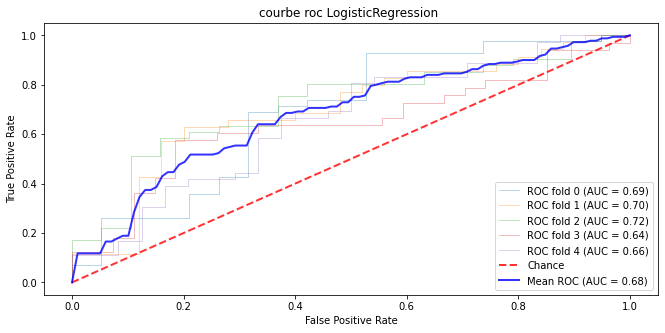

Accuracy: [0.68852459 0.65       0.63333333 0.65       0.63333333]
moy_accuracy: 0.65
precision: [0.81081081 0.70588235 0.78787879 0.7        0.71875   ]
moy_precision: 0.74
sensibilité : [0.71428571 0.68571429 0.63414634 0.63636364 0.63888889]
moy_sensibilité: 0.66
spécificité : [0.63157895 0.6        0.63157895 0.66666667 0.625     ]
moy_spécificité: 0.63
MCC : [0.3278696  0.28425614 0.24846359 0.30151134 0.25913374]
MCC: 0.28
MCC : [0.3278696  0.28425614 0.24846359 0.30151134 0.25913374]
MCC: 0.28
balanced_accuracy : [0.67293233 0.64285714 0.63286264 0.65151515 0.63194444]
balanced_accuracy: 0.65
roc_auc : [0.69298246 0.69942857 0.72528883 0.64085297 0.66898148]
roc_auc: 0.69
cohen_kappa_scorec : [0.32261835 0.28409091 0.23875433 0.3        0.25675676]
cohen_kappa_scorec: 0.28
RandomForestClassifier


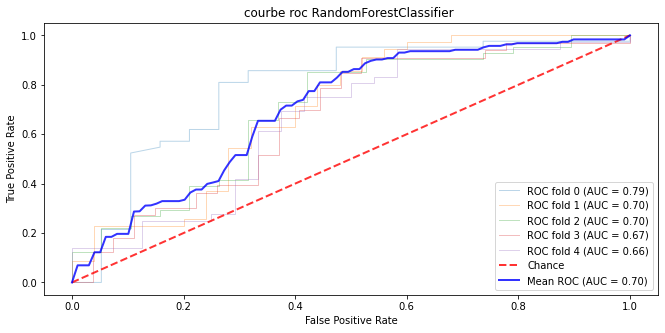

Accuracy: [0.80327869 0.73333333 0.75       0.71666667 0.7       ]
moy_accuracy: 0.74
precision: [0.8125     0.70212766 0.79545455 0.68181818 0.69565217]
moy_precision: 0.74
sensibilité : [0.92857143 0.94285714 0.85365854 0.90909091 0.88888889]
moy_sensibilité: 0.90
spécificité : [0.52631579 0.44       0.52631579 0.48148148 0.41666667]
moy_spécificité: 0.48
MCC : [0.51441412 0.45816317 0.3997023  0.43939394 0.3539192 ]
MCC: 0.43
MCC : [0.51441412 0.45816317 0.3997023  0.43939394 0.3539192 ]
MCC: 0.43
balanced_accuracy : [0.72744361 0.69142857 0.68998716 0.6952862  0.65277778]
balanced_accuracy: 0.69
roc_auc : [0.78759398 0.704      0.6970475  0.66891134 0.65972222]
roc_auc: 0.70
cohen_kappa_scorec : [0.49794239 0.41104294 0.39678284 0.40559441 0.32835821]
cohen_kappa_scorec: 0.41
GradientBoostingClassifier


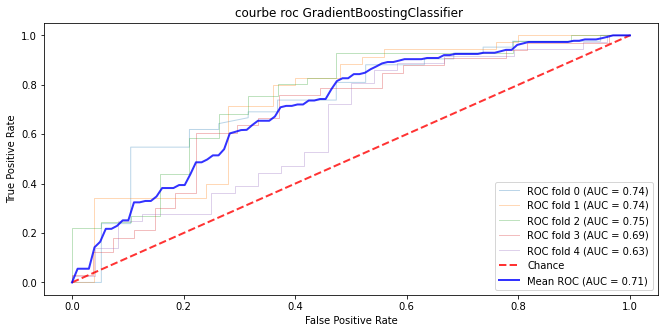

Accuracy: [0.75409836 0.71666667 0.76666667 0.65       0.66666667]
moy_accuracy: 0.71
precision: [0.78723404 0.725      0.8        0.63636364 0.69047619]
moy_precision: 0.73
sensibilité : [0.88095238 0.82857143 0.87804878 0.84848485 0.80555556]
moy_sensibilité: 0.85
spécificité : [0.47368421 0.56       0.52631579 0.40740741 0.45833333]
moy_spécificité: 0.49
MCC : [0.39054586 0.40637773 0.43440012 0.28787879 0.28210909]
MCC: 0.36
MCC : [0.39054586 0.40637773 0.43440012 0.28787879 0.28210909]
MCC: 0.36
balanced_accuracy : [0.6773183  0.69428571 0.70218228 0.62794613 0.63194444]
balanced_accuracy: 0.67
roc_auc : [0.73997494 0.73942857 0.75481386 0.69472503 0.63194444]
roc_auc: 0.71
cohen_kappa_scorec : [0.38217421 0.4        0.42857143 0.26573427 0.27536232]
cohen_kappa_scorec: 0.35
GaussianNB


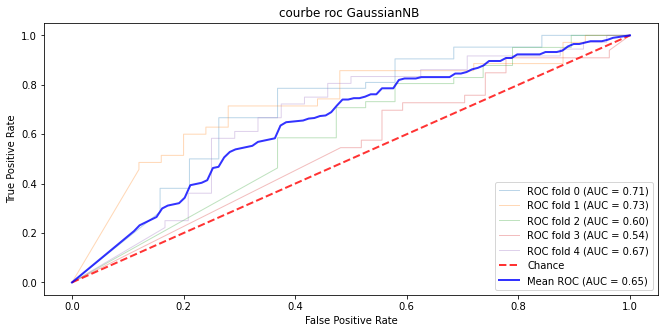

Accuracy: [0.68852459 0.65       0.63333333 0.56666667 0.68333333]
moy_accuracy: 0.64
precision: [0.81081081 0.68421053 0.73170732 0.58536585 0.72972973]
moy_precision: 0.71
sensibilité : [0.71428571 0.74285714 0.73170732 0.72727273 0.75      ]
moy_sensibilité: 0.73
spécificité : [0.63157895 0.52       0.42105263 0.37037037 0.58333333]
moy_spécificité: 0.51
MCC : [0.3278696  0.26891849 0.15275995 0.10442673 0.33586971]
MCC: 0.24
MCC : [0.3278696  0.26891849 0.15275995 0.10442673 0.33586971]
MCC: 0.24
balanced_accuracy : [0.67293233 0.63142857 0.57637997 0.54882155 0.66666667]
balanced_accuracy: 0.62
roc_auc : [0.70927318 0.72685714 0.60269576 0.54320988 0.66666667]
roc_auc: 0.65
cohen_kappa_scorec : [0.32261835 0.26744186 0.15275995 0.10034602 0.33566434]
cohen_kappa_scorec: 0.24
KNeighborsClassifier


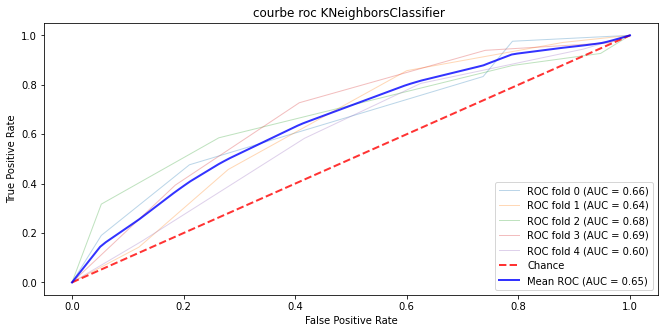

Accuracy: [0.57377049 0.56666667 0.63333333 0.66666667 0.58333333]
moy_accuracy: 0.60
precision: [0.83333333 0.69565217 0.82758621 0.68571429 0.67741935]
moy_precision: 0.74
sensibilité : [0.47619048 0.45714286 0.58536585 0.72727273 0.58333333]
moy_sensibilité: 0.57
spécificité : [0.78947368 0.72       0.73684211 0.59259259 0.58333333]
moy_spécificité: 0.68
MCC : [0.25184187 0.17962339 0.29993362 0.32277655 0.16339011]
MCC: 0.24
MCC : [0.25184187 0.17962339 0.29993362 0.32277655 0.16339011]
MCC: 0.24
balanced_accuracy : [0.63283208 0.58857143 0.66110398 0.65993266 0.58333333]
balanced_accuracy: 0.63
roc_auc : [0.65789474 0.64114286 0.68164313 0.68742985 0.60069444]
roc_auc: 0.65
cohen_kappa_scorec : [0.21094527 0.1657754  0.27552141 0.3220339  0.16107383]
cohen_kappa_scorec: 0.23


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred): 
    value = cohen_kappa_score(y_true,y_pred)
    return value


my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)


cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(Xt1, yt1)):
         clf.fit(Xt1.loc[train,], yt1.loc[train,])
         viz = plot_roc_curve(clf, Xt1.loc[test,], yt1.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, Xt1, yt1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, Xt1, yt1, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, Xt1, yt1, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, Xt1, yt1, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, Xt1, yt1, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, Xt1, yt1, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, Xt1, yt1, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, Xt1, yt1, scoring=my_scorer2, cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

In [ ]:
 classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)

}
for name, clf in classifiers.items():
    print(name)
    # prepare the cross-validation procedure
    loo =LeaveOneOut()
    # evaluate model
    scores1 = cross_val_score(clf, Xt1, yt1, scoring='accuracy', cv=loo, n_jobs=-1)
    # report performance
    print('accuracy: %.2f' % mean(scores1))

XGBClassifier
accuracy: 0.68
LogisticRegression
accuracy: 0.65
RandomForestClassifier
accuracy: 0.72
GradientBoostingClassifier
accuracy: 0.72
GaussianNB
accuracy: 0.67
KNeighborsClassifier
accuracy: 0.59




*   SMOTE




In [ ]:
Xt2 = datat1.loc[:, datat1.columns != 'Cx_theileri']
yt2 = datat1.Cx_theileri

In [ ]:
Xt_2=Xt2.values

In [ ]:
Xt_2

array([[-1.59114200e+01,  2.37947400e+01,  0.00000000e+00, ...,
         5.40000010e+00,  5.50000000e+00,  4.90000010e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       ...,
       [-5.83395400e+00,  3.57594650e+01,  0.00000000e+00, ...,
         3.50000000e+00,  3.79999995e+00,  3.90000010e+00],
       [-5.36666700e+00,  3.57666670e+01,  8.49576950e+00, ...,
         4.00000000e+00,  4.00000000e+00,  4.19999981e+00],
       [-5.81666700e+00,  3.57833330e+01,  0.00000000e+00, ...,
         3.59999990e+00,  3.79999995e+00,  4.00000000e+00]])

In [ ]:
yt2

0      0
1      0
2      0
3      1
4      0
      ..
296    1
297    1
298    1
299    1
300    1
Name: Cx_theileri, Length: 301, dtype: int64

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    steps = [('over', SMOTE()), ('model', clf)]
    pipeline = Pipeline(steps=steps)
    print(name)
    scores = cross_val_score(pipeline, Xt_2, yt2, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(pipeline, Xt_2, yt2, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(pipeline, Xt_2, yt2, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(pipeline, Xt_2, yt2, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(pipeline, Xt_2, yt2, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(pipeline, Xt_2, yt2, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(pipeline, Xt_2, yt2, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(pipeline, Xt_2, yt2, scoring=my_scorer2, cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier
Accuracy: [0.70491803 0.7        0.61666667 0.65       0.73333333]
moy_accuracy: 0.68
precision: [0.85       0.67647059 0.76923077 0.675      0.73170732]
moy_precision: 0.74
sensibilité : [0.85714286 0.62857143 0.70731707 0.81818182 0.80555556]
moy_sensibilité: 0.76
spécificité : [0.57894737 0.52       0.52631579 0.51851852 0.54166667]
moy_spécificité: 0.54
MCC : [0.49624104 0.32277655 0.2001954  0.28787879 0.39492935]
MCC: 0.34
MCC : [0.49624104 0.32277655 0.2001954  0.28787879 0.39492935]
MCC: 0.34
balanced_accuracy : [0.7443609  0.70571429 0.67137356 0.61616162 0.70138889]
balanced_accuracy: 0.69
roc_auc : [0.7424812  0.66057143 0.66752246 0.66554433 0.64236111]
roc_auc: 0.68
cohen_kappa_scorec : [0.51019148 0.25423729 0.2709599  0.3728223  0.35714286]
cohen_kappa_scorec: 0.35
LogisticRegression
Accuracy: [0.68852459 0.71666667 0.66666667 0.63333333 0.6       ]
moy_accuracy: 0.66
precision: [0.76470588 0.86206897 0.78787879 0.7        0.65789474]
moy_precision: 0.75
se

In [ ]:
   print(model.get_booster().get_score(importance_type= f))  

In [ ]:
classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1),
}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    steps = [('over', SMOTE()), ('model', clf)]
    pipeline = Pipeline(steps=steps)
    print(name)
    print(pipeline.get_booster().get_score(importance_type= f))  
    scores = cross_val_score(pipeline, Xt_2, yt2, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(pipeline, Xt_2, yt2, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(pipeline, Xt_2, yt2, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(pipeline, Xt_2, yt2, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(pipeline, Xt_2, yt2, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(pipeline, Xt_2, yt2, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(pipeline, Xt_2, yt2, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(pipeline, Xt_2, yt2, scoring=my_scorer2, cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))

XGBClassifier


AttributeError: ignored

In [31]:
COLUM=Xt2.columns

In [32]:
COLUM

Index(['X_long', 'Y_lat', 'Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides',
       'Coniferes', 'ZoneAride', 'ZonePel',
       ...
       'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin', 'Vent_Juill',
       'Vent_Aout', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=225)

In [33]:
oversample = SMOTE()
X4, y4 = oversample.fit_resample(Xt2, yt2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [34]:
X4

array([[-1.59114200e+01,  2.37947400e+01,  0.00000000e+00, ...,
         5.40000010e+00,  5.50000000e+00,  4.90000010e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       ...,
       [-5.74366671e+00,  3.55781389e+01,  6.38955446e+00, ...,
         3.23055557e+00,  3.20833332e+00,  3.49166673e+00],
       [-9.49055519e+00,  2.92181974e+01,  7.42336363e-02, ...,
         3.79999995e+00,  3.20000005e+00,  3.09999990e+00],
       [-8.04861153e+00,  3.12788309e+01,  7.07929606e+00, ...,
         2.55934660e+00,  2.43901999e+00,  2.63902004e+00]])

In [38]:
COLUM[1]

'Y_lat'

In [40]:
f = pd.DataFrame(X4,columns=[COLUM])

In [41]:
f

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0.000000,97.000000,3.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,3340.000000,570.000000,110.000000,50.000000,47.000000,2.000000,0.000000,49.000000,2690.000000,3950.000000,566.000000,160.000000,231.000000,0.0,14905.000000,96.000000,83.000000,7.000000,30.000000,23.000000,0.0,53.000000,...,26.500000,26.000000,24.500000,22.500000,14.500000,14.800000,15.700000,15.600000,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.200000,1.310000,1.440000,1.550000,1.630000,1.720000,1.910000,2.070000,2.180000,2.160000,2.020000,1.710000,1.470000,4.800000,5.600000,6.100000,6.900000,7.200000,7.100000,7.500000,7.200000,6.300000,5.400000,5.500000,4.900000
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4010.000000,660.000000,10.000000,50.000000,73.000000,0.000000,0.000000,73.000000,3350.000000,4660.000000,581.000000,33.000000,49.000000,0.0,15360.000000,312.000000,126.000000,31.000000,74.000000,12.000000,1.0,87.000000,...,29.200001,27.600000,25.100000,22.600000,12.000000,12.800000,14.200000,14.700000,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.800000,1.180000,1.320000,1.420000,1.500000,1.620000,1.840000,2.030000,2.100000,2.090000,1.950000,1.600000,1.390000,4.200000,4.100000,4.800000,5.600000,5.700000,6.400000,5.900000,5.900000,5.700000,4.300000,3.700000,3.800000
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,4010.000000,660.000000,10.000000,50.000000,73.000000,0.000000,0.000000,73.000000,3350.000000,4660.000000,581.000000,33.000000,49.000000,0.0,15360.000000,312.000000,126.000000,31.000000,74.000000,12.000000,1.0,87.000000,...,29.200001,27.600000,25.100000,22.600000,12.000000,12.800000,14.200000,14.700000,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.800000,1.180000,1.320000,1.420000,1.500000,1.620000,1.840000,2.030000,2.100000,2.090000,1.950000,1.600000,1.390000,4.200000,4.100000,4.800000,5.600000,5.700000,6.400000,5.900000,5.900000,5.700000,4.300000,3.700000,3.800000
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,3580.000000,590.000000,40.000000,50.000000,48.000000,0.000000,0.000000,48.000000,2930.000000,4140.000000,600.000000,214.000000,106.000000,0.0,15264.000000,306.000000,120.000000,23.000000,74.000000,11.000000,0.0,85.000000,...,29.200001,27.600000,25.100000,22.700001,12.300000,13.100000,14.400000,15.000000,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.100000,1.190000,1.330000,1.430000,1.520000,1.640000,1.860000,2.040000,2.120000,2.100000,1.970000,1.610000,1.400000,4.200000,4.500000,5.100000,5.600000,5.500000,6.200000,6.200000,6.200000,5.700000,4.100000,3.700000,3.900000
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0.000000,100.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,3000.000000,590.000000,70.000000,10.000000,18.000000,0.000000,0.000000,18.000000,2350.000000,3540.000000,577.000000,1

In [43]:
len(y4)

374

In [45]:
Y=pd.DataFrame(y4,columns=["Cx_theileri"])

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

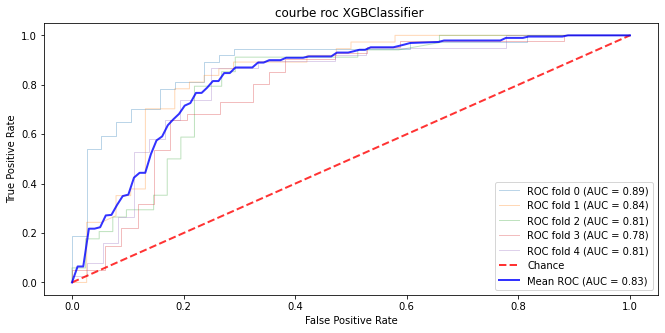

Accuracy: [0.8        0.78666667 0.78666667 0.73333333 0.75675676]
moy_accuracy: 0.77
precision: [0.82352941 0.83870968 0.75       0.74418605 0.76315789]
moy_precision: 0.78
sensibilité : [0.75675676 0.7027027  0.79411765 0.7804878  0.76315789]
moy_sensibilité: 0.76
spécificité : [0.84210526 0.86842105 0.7804878  0.67647059 0.75      ]
moy_spécificité: 0.78
MCC : [0.60143409 0.57985005 0.57255548 0.45993751 0.51315789]
MCC: 0.55
MCC : [0.60143409 0.57985005 0.57255548 0.45993751 0.51315789]
MCC: 0.55
balanced_accuracy : [0.79943101 0.78556188 0.78730273 0.7284792  0.75657895]
balanced_accuracy: 0.77
roc_auc : [0.88762447 0.84459459 0.80667145 0.78479197 0.81140351]
roc_auc: 0.83
cohen_kappa_scorec : [0.5995016  0.57234498 0.57173448 0.4592646  0.51315789]
cohen_kappa_scorec: 0.54
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

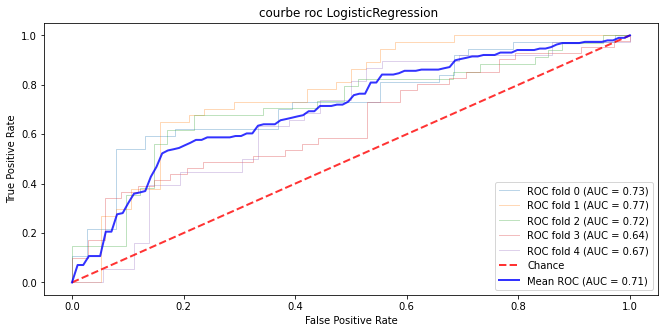

Accuracy: [0.64       0.70666667 0.69333333 0.57333333 0.62162162]
moy_accuracy: 0.65
precision: [0.63157895 0.72727273 0.65714286 0.6        0.63157895]
moy_precision: 0.65
sensibilité : [0.64864865 0.64864865 0.67647059 0.65853659 0.63157895]
moy_sensibilité: 0.65
spécificité : [0.63157895 0.76315789 0.70731707 0.47058824 0.61111111]
moy_spécificité: 0.64
MCC : [0.2802276  0.41476709 0.38296438 0.13121221 0.24269006]
MCC: 0.29
MCC : [0.2802276  0.41476709 0.38296438 0.13121221 0.24269006]
MCC: 0.29
balanced_accuracy : [0.6401138  0.70590327 0.69189383 0.56456241 0.62134503]
balanced_accuracy: 0.64
roc_auc : [0.73826458 0.71763869 0.71018651 0.64418938 0.66154971]
roc_auc: 0.69
cohen_kappa_scorec : [0.28012798 0.41239316 0.38282648 0.13043478 0.24269006]
cohen_kappa_scorec: 0.29
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed whe

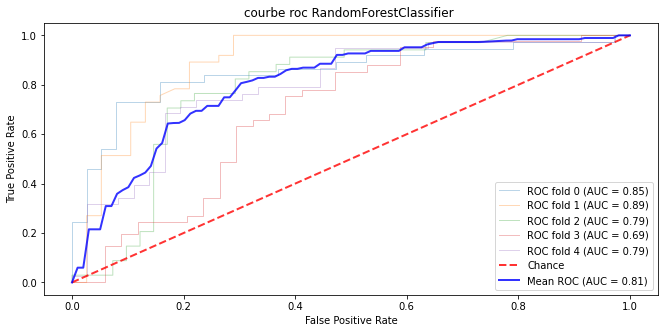

Accuracy: [0.81333333 0.81333333 0.76       0.68       0.71621622]
moy_accuracy: 0.76
precision: [0.81081081 0.79487179 0.72222222 0.68085106 0.69767442]
moy_precision: 0.74
sensibilité : [0.81081081 0.83783784 0.76470588 0.7804878  0.78947368]
moy_sensibilité: 0.80
spécificité : [0.81578947 0.78947368 0.75609756 0.55882353 0.63888889]
moy_spécificité: 0.71
MCC : [0.62660028 0.62775817 0.51894542 0.34922217 0.4339498 ]
MCC: 0.51
MCC : [0.62660028 0.62775817 0.51894542 0.34922217 0.4339498 ]
MCC: 0.51
balanced_accuracy : [0.81330014 0.81365576 0.76040172 0.66965567 0.71418129]
balanced_accuracy: 0.75
roc_auc : [0.8541963  0.89295875 0.78981349 0.69440459 0.79459064]
roc_auc: 0.81
cohen_kappa_scorec : [0.62660028 0.62686567 0.51820128 0.34450109 0.42993397]
cohen_kappa_scorec: 0.51
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

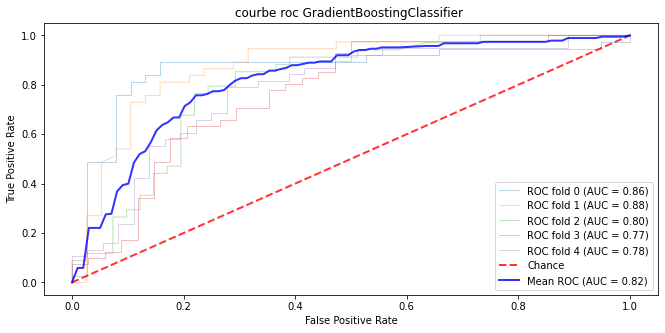

Accuracy: [0.84       0.81333333 0.73333333 0.70666667 0.74324324]
moy_accuracy: 0.77
precision: [0.85714286 0.81081081 0.71875    0.71111111 0.73170732]
moy_precision: 0.77
sensibilité : [0.81081081 0.81081081 0.67647059 0.7804878  0.78947368]
moy_sensibilité: 0.77
spécificité : [0.86842105 0.81578947 0.7804878  0.61764706 0.69444444]
moy_spécificité: 0.76
MCC : [0.6806858  0.62660028 0.45993751 0.40457097 0.48659321]
MCC: 0.53
MCC : [0.6806858  0.62660028 0.45993751 0.40457097 0.48659321]
MCC: 0.53
balanced_accuracy : [0.83961593 0.81330014 0.7284792  0.69906743 0.74195906]
balanced_accuracy: 0.76
roc_auc : [0.86415363 0.87802276 0.79985653 0.76829268 0.77850877]
roc_auc: 0.82
cohen_kappa_scorec : [0.6797153  0.62660028 0.4592646  0.40217391 0.48498168]
cohen_kappa_scorec: 0.53
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

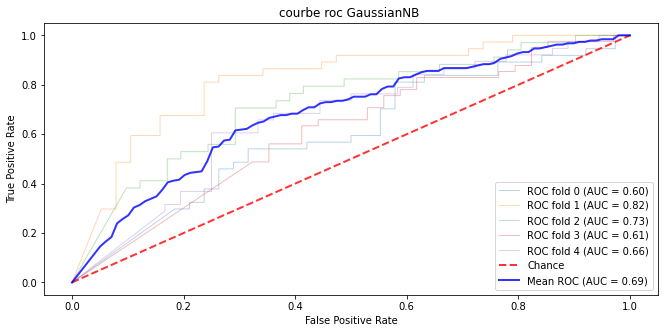

Accuracy: [0.56       0.77333333 0.68       0.61333333 0.66216216]
moy_accuracy: 0.66
precision: [0.54166667 0.73809524 0.61904762 0.60714286 0.66666667]
moy_precision: 0.63
sensibilité : [0.7027027  0.83783784 0.76470588 0.82926829 0.68421053]
moy_sensibilité: 0.76
spécificité : [0.42105263 0.71052632 0.6097561  0.35294118 0.63888889]
moy_spécificité: 0.55
MCC : [0.12890035 0.55230643 0.37554112 0.20856024 0.32345427]
MCC: 0.32
MCC : [0.12890035 0.55230643 0.37554112 0.20856024 0.32345427]
MCC: 0.32
balanced_accuracy : [0.56187767 0.77418208 0.68723099 0.59110473 0.66154971]
balanced_accuracy: 0.66
roc_auc : [0.60206259 0.81934566 0.72596844 0.61406026 0.6630117 ]
roc_auc: 0.68
cohen_kappa_scorec : [0.12327311 0.54739084 0.36708861 0.18934029 0.32333577]
cohen_kappa_scorec: 0.31
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed

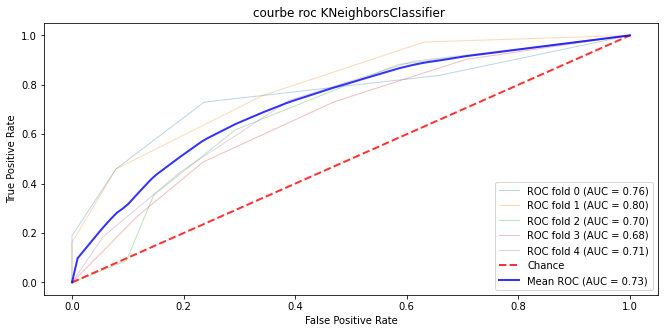

Accuracy: [0.69333333 0.69333333 0.62666667 0.61333333 0.62162162]
moy_accuracy: 0.65
precision: [0.85       0.85       0.66666667 0.71428571 0.70833333]
moy_precision: 0.76
sensibilité : [0.45945946 0.45945946 0.35294118 0.48780488 0.44736842]
moy_sensibilité: 0.44
spécificité : [0.92105263 0.92105263 0.85365854 0.76470588 0.80555556]
moy_spécificité: 0.85
MCC : [0.43019443 0.43019443 0.24081715 0.25988627 0.27004891]
MCC: 0.33
MCC : [0.43019443 0.43019443 0.24081715 0.25988627 0.27004891]
MCC: 0.33
balanced_accuracy : [0.69025605 0.69025605 0.60329986 0.62625538 0.62646199]
balanced_accuracy: 0.65
roc_auc : [0.76386913 0.79836415 0.69583931 0.67575323 0.71381579]
roc_auc: 0.73
cohen_kappa_scorec : [0.38282648 0.38282648 0.21524664 0.24452935 0.25036179]
cohen_kappa_scorec: 0.30


In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred): 
    value = cohen_kappa_score(y_true,y_pred)
    return value


my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)


cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(f, Y)):
         clf.fit(f.loc[train,], Y.loc[train,])
         viz = plot_roc_curve(clf, f.loc[test,], Y.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf,f, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, f, Y, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, f, Y, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, f, Y, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, f, Y, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, f, Y, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, f, Y, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, f, Y, scoring=my_scorer2, cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))